# Visualization Koan

作ったデータを可視化する方法を学びます。

可視化ライブラリーはたくさんありますが、ここでは[Matplotlib](https://matplotlib.org/)を使った基本的な可視化を勉強します。





## 前準備とインポート

Jupyter notebook 上で matplotlib を使って可視化するには以下のコマンド実行する必要があります。

```
%matplotlib inline
import matplotlib.pyplot as plt
```

+ `%matplotlib inline` : マジックコマンドと呼ばれる、Jupyter notebook 固有のコマンド。これを実行してはじめて、グラフが表示される。最初に一度だけすればよい。
+ `import matplotlib.pyplot as plt`: matplotlibをインポート。慣習として plt と略することが多い。

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

# これは日本語が化けないようにするライブラリ
!pip install japanize-matplotlib
import japanize_matplotlib 

     |████████████████████████████████| 4.1MB 4.8MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.0.5-cp36-none-any.whl size=4118721 sha256=66b0676dac8eec06b7b05404a5c4b990677a4fd1eeaa0bc7916250d78414cc3e
  Stored in directory: /root/.cache/pip/wheels/6c/8a/08/4a784957da9f3c2b4839b4986be2fba2a481877318948be52c
Successfully built japanize-matplotlib


## figure の基本

matplotlib で描画するには、

1. まず、 `plt.figure()` で、**グラフを書く場所**を確保。
1. その中に subplot() で**実際にグラフを描く**オブジェクトを作る。

という手順を踏みます。

![](https://docs.google.com/drawings/d/e/2PACX-1vSxgt8ZgnWcPd_i9rH0GIXQOCuadgJWhRYf_7dTwJY5IFDIuqWalx0blfQ0FUk_mK45eg2db6NZrGj0/pub?w=960&h=256)

通常、 `plt.figure()` を `fig` という変数に格納しますので、以後 `fig` で話します。

`fig` は、グラフを書く場所と思ってください。








In [0]:
# 場所の確保 fig で表現することがおおい。
fig =  plt.figure() 

<Figure size 432x288 with 0 Axes>

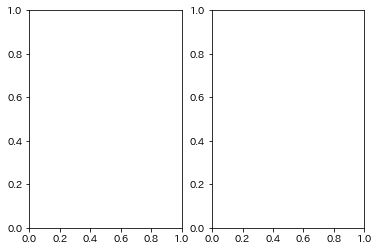

In [0]:
# グラフを描くオブジェクトを作成
# add_subplot() は、グラフを描画するオブジェクトを返す。
# add_subplot(縦列数, 横行数, 住所番号)で引数をわたし、 figに重ねて行くイメージ
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
fig

## 問題1


In [0]:
# 上記画像の２番目と３番目を描画してください。


## 問題２


In [0]:
# 一つだけ描けばいい場合はどのように書いたらよいでしょうか？

## 描画(折れ線グラフ）

+ 描画オブジェクトの .plot() を使って、折れ線グラフを描きましょう。




### Google Drive に入っているファイルを利用する

1. ドライブをマウントします
    ```python
    from google.colab import drive
    drive.mount('/content/drive')
    ```
1. 「Go to this URL in a browser 」とともにURLが出ますので，そこへJump．
1. Google Accountを選ぶ
1. コードが出ますので，それをコピー
1. 貼り付けるとマウントが完了します．
1. ←ペインの「ファイル」を開くと，My Driveのディレクトリが表示されます．

In [0]:
# google drive のファイルにアクセス出来るようにマウントする
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# データ取得. 下のパスはこのipynbが入っているところのURLを書きます。
import glob 
stocks_dir = "/content/drive/My Drive/Fintalk/Fintalk Koan/stocks"
glob.glob(stocks_dir + "/*.csv")


['/content/drive/My Drive/Fintalk/Fintalk Koan/stocks/stockprice_4063_2019-10-01.csv',
 '/content/drive/My Drive/Fintalk/Fintalk Koan/stocks/stockprice_9432_2019-10-01.csv',
 '/content/drive/My Drive/Fintalk/Fintalk Koan/stocks/stockprice_7203_2019-10-01.csv',
 '/content/drive/My Drive/Fintalk/Fintalk Koan/stocks/stockprice_6758_2019-10-01.csv']

In [0]:
# stocks に入っている株価データをDataFrame化

import pandas as pd 
def read_csv(file_path):
    df = pd.read_csv(file_path, index_col="datetime", parse_dates=True)
    return df 

l = list() 
for file_path in glob.glob(stocks_dir + "/*.csv"):
    l.append(read_csv(file_path))

df = pd.concat(l, axis=1)
df.head()

,4063,9432,7203,6758
datetime,,,,
2019-01-04,8290,4532,6346,5182
2019-01-07,8643,4495,6546,5370
2019-01-08,8692,4507,6626,5376
2019-01-09,8749,4499,6677,5413
2019-01-10,8575,4593,6704,5246


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


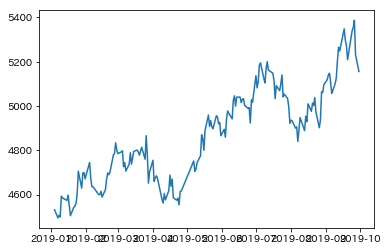

In [0]:
# では、9432 を描画してみましょう

# fig をつくって、
fig = plt.figure() 

# subplot を作って
ax = fig.add_subplot(1,1,1)

# そのオブジェクトで描画します
ax.plot(df["9432"])

## 問題3

In [0]:
# 9432 7203 6758 4063 全てを描画してみましょう。 
# add_subplot() を使って、２✕２のプロットで書いてください。



## グラフの設定

+ グラフの設定は、fig にする設定と、ax (subplot) にする設定があります。


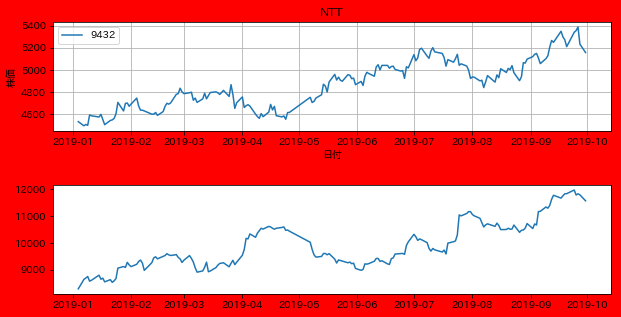

In [0]:
# fig にする設定
fig = plt.figure(
    figsize=(10,5), # figsize を変更する. 
    facecolor="red", # 背面の色変更
    )

# subplot にする設定。
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax1.plot(df["9432"])
ax2.plot(df["4063"])

# 罫線を入れる
ax1.grid()

# title を入れる
ax1.set_title("NTT")

# x軸名を入れる
ax1.set_xlabel("日付")

# y軸名を入れる
ax1.set_ylabel("株価")

# 凡例
ax1.legend()

# subplot間の余白を調整する
fig.subplots_adjust(wspace=0.5, hspace=0.5)



## 問題4　
上記 `ax2` に対して、 `ax1` と同じ設定を入れてください。また、fig の設定を変更して見て下さい。



In [0]:
# df の 20日移動平均を算出
df_20MA = df.rolling(window=20).mean()

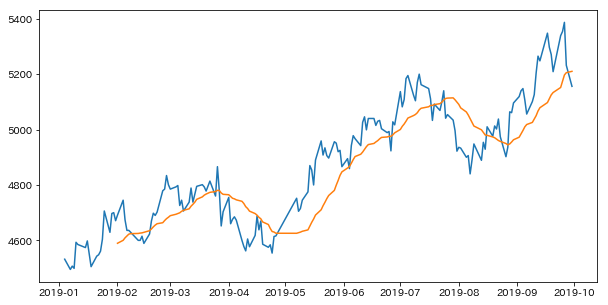

In [0]:
# 終値と20日移動平均を、重ねて描画

fig = plt.figure(
    figsize=(10,5), # figsize を変更する. 
    )
ax = fig.add_subplot(1,1,1)
ax.plot(df["9432"])
ax.plot(df_20MA["9432"])





## 問題5 




In [0]:
# 各銘柄で、終値と20日移動平均を重ねて描画してください。
# こちらも２✕２の subplot で描画しましょう。


## 描画（散布図）

+ `scatter()` 


In [0]:
# 終値と２０日移動平均の差（比率）を取得
df_diff = df / df_20MA
df_diff.tail()

,9432,7203,6758,4063
datetime,,,,
2019-09-24,1.036317,1.044022,1.025387,1.071685
2019-09-25,1.034689,1.023982,1.037896,1.048601
2019-09-26,1.036560,1.032048,1.019383,1.046295
2019-09-27,1.005110,1.020722,1.001964,1.036766
2019-09-30,0.989607,0.997277,0.997564,1.012880


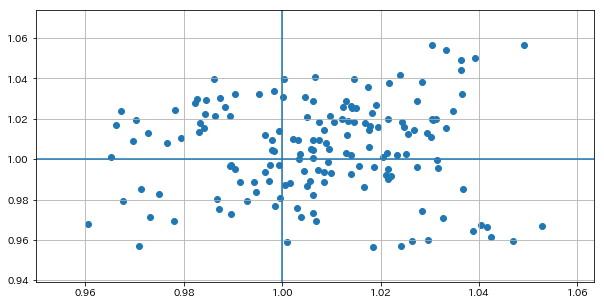

In [0]:
# 9432 と 7203 の df_diff を比べてみます。
# つまり、NTTの過去２０日平均と現在の終値の比率と、トヨタの過去２０日平均と現在の終値の比率は、どれくらい似ているか
# を確認出来ます。
ください
fig = plt.figure(
    figsize=(10,5), # figsize を変更する. 
    )
ax = fig.add_subplot(1,1,1)
ax.scatter(df_diff["9432"], df_diff["7203"])

ax.grid()
# 基準は1なので、x=1, y=1 のところに線を引くとわかりやすくなる。
ax.axvline(x=1)
ax.axhline(y=1)



## 問題6

In [0]:
# 9432,7203,6758,4063 全組み合わせを上記のように散布部を作ってください


In [0]:
## test

In [0]:
# test kame